In [15]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import seaborn as sns 

base_url = r'/home/amit/DataScienceProject/PredictDroughts/'

Preparation to Machine Learning

In [3]:
df = pd.read_csv(base_url + 'files/merge.csv', index_col=0)
df

,Week,State,Postal Code,Fips,Longitude,Latitude,PRECTOT,WS10M_MIN,QV2M,T2M_RANGE,...,WS50M_RANGE,WS50M_MAX,WS10M_MAX,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,Aland_SQMI,LEVEL
0,2000-01-04,Alabama,AL,1,-86.902298,32.318231,12.35,2.14,6.84,15.39,...,5.24,8.80,5.44,3.30,100.72,6.95,2.85,6.97,31400.1046,1
1,2000-01-11,Alabama,AL,1,-86.902298,32.318231,0.97,1.18,7.09,13.70,...,4.09,6.18,2.51,1.33,100.83,8.89,5.91,8.89,31400.1046,1
2,2000-01-18,Alabama,AL,1,-86.902298,32.318231,1.80,1.59,9.91,6.50,...,2.75,6.29,3.87,2.28,100.82,13.94,11.96,13.94,31400.1046,1
3,2000-01-25,Alabama,AL,1,-86.902298,32.318231,0.00,2.20,2.15,10.89,...,3.71,7.61,4.35,2.16,100.53,-7.34,-4.39,-7.14,31400.1046,1
4,2000-02-01,Alabama,AL,1,-86.902298,32.318231,0.01,0.73,3.38,15.38,...,5.12,6.04,2.41,1.69,101.43,-1.58,-3.99,-1.55,31400.1046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56787,2021-05-11,Wyoming,WY,56,-107.290284,43.075968,0.70,2.00,3.90,10.46,...,4.09,7.08,6.11,4.11,81.57,-2.45,-2.92,0.02,60197.7468,2
56788,2021-05-18,Wyoming,WY,56,-107.290284,43.075968,0.00,0.47,6.54,17.38,...,6.01,6.73,3.36,2.89,80.75,4.49,6.61,10.45,60197.7468,1
56789,2021-05-25,Wyoming,WY,56,-107.290284,43.075968,0.11,0.95,5.07,16.60,...,7.49,9.18,6.45,5.50,81.35,1.03,3.02,6.50,60197.7468,1
56790,2021-06-01,Wyoming,WY,56,-107.290284,43.075968,1.19,1.75,7.33,12.02,...,3.61,6.54,4.33,2.58,81.70,6.35,9.74,11.27,60197.7468,1


In [4]:
# Seperate date to year, month and day

df['Week'] = pd.to_datetime(df['Week'])
set_year = df['Week'].dt.year.to_list()
set_month = df['Week'].dt.month.to_list()
set_day = df['Week'].dt.day.to_list()
df.insert(0, "Year", set_year, None)
df.insert(1, "Month", set_month, None)
df.insert(2, "Day", set_day, None)
df = df.drop(columns='Week', axis=1)
df

,Year,Month,Day,State,Postal Code,Fips,Longitude,Latitude,PRECTOT,WS10M_MIN,...,WS50M_RANGE,WS50M_MAX,WS10M_MAX,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,Aland_SQMI,LEVEL
0,2000,1,4,Alabama,AL,1,-86.902298,32.318231,12.35,2.14,...,5.24,8.80,5.44,3.30,100.72,6.95,2.85,6.97,31400.1046,1
1,2000,1,11,Alabama,AL,1,-86.902298,32.318231,0.97,1.18,...,4.09,6.18,2.51,1.33,100.83,8.89,5.91,8.89,31400.1046,1
2,2000,1,18,Alabama,AL,1,-86.902298,32.318231,1.80,1.59,...,2.75,6.29,3.87,2.28,100.82,13.94,11.96,13.94,31400.1046,1
3,2000,1,25,Alabama,AL,1,-86.902298,32.318231,0.00,2.20,...,3.71,7.61,4.35,2.16,100.53,-7.34,-4.39,-7.14,31400.1046,1
4,2000,2,1,Alabama,AL,1,-86.902298,32.318231,0.01,0.73,...,5.12,6.04,2.41,1.69,101.43,-1.58,-3.99,-1.55,31400.1046,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56787,2021,5,11,Wyoming,WY,56,-107.290284,43.075968,0.70,2.00,...,4.09,7.08,6.11,4.11,81.57,-2.45,-2.92,0.02,60197.7468,2
56788,2021,5,18,Wyoming,WY,56,-107.290284,43.075968,0.00,0.47,...,6.01,6.73,3.36,2.89,80.75,4.49,6.61,10.45,60197.7468,1
56789,2021,5,25,Wyoming,WY,56,-107.290284,43.075968,0.11,0.95,...,7.49,9.18,6.45,5.50,81.35,1.03,3.02,6.50,60197.7468,1
56790,2021,6,1,Wyoming,WY,56,-107.290284,43.075968,1.19,1.75,...,3.61,6.54,4.33,2.58,81.70,6.35,9.74,11.27,60197.7468,1


In [5]:
# One hot encoding on level column

encoding_columns = pd.get_dummies(df['LEVEL'], prefix="level")
df = df.join(encoding_columns)
df

,Year,Month,Day,State,Postal Code,Fips,Longitude,Latitude,PRECTOT,WS10M_MIN,...,T2MDEW,T2M_MIN,T2MWET,Aland_SQMI,LEVEL,level_0,level_1,level_2,level_3,level_4
0,2000,1,4,Alabama,AL,1,-86.902298,32.318231,12.35,2.14,...,6.95,2.85,6.97,31400.1046,1,0,1,0,0,0
1,2000,1,11,Alabama,AL,1,-86.902298,32.318231,0.97,1.18,...,8.89,5.91,8.89,31400.1046,1,0,1,0,0,0
2,2000,1,18,Alabama,AL,1,-86.902298,32.318231,1.80,1.59,...,13.94,11.96,13.94,31400.1046,1,0,1,0,0,0
3,2000,1,25,Alabama,AL,1,-86.902298,32.318231,0.00,2.20,...,-7.34,-4.39,-7.14,31400.1046,1,0,1,0,0,0
4,2000,2,1,Alabama,AL,1,-86.902298,32.318231,0.01,0.73,...,-1.58,-3.99,-1.55,31400.1046,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56787,2021,5,11,Wyoming,WY,56,-107.290284,43.075968,0.70,2.00,...,-2.45,-2.92,0.02,60197.7468,2,0,0,1,0,0
56788,2021,5,18,Wyoming,WY,56,-107.290284,43.075968,0.00,0.47,...,4.49,6.61,10.45,60197.7468,1,0,1,0,0,0
56789,2021,5,25,Wyoming,WY,56,-107.290284,43.075968,0.11,0.95,...,1.03,3.02,6.50,60197.7468,1,0,1,0,0,0
56790,2021,6,1,Wyoming,WY,56,-107.290284,43.075968,1.19,1.75,...,6.35,9.74,11.27,60197.7468,1,0,1,0,0,0


In [6]:
# Drop all the objects (string) type and Train X

X = df[df.columns[(df.columns != 'LEVEL') & (df.columns != 'State') & (df.columns != 'Postal Code') & (df.columns != 'Aland_SQMI')]]
X

,Year,Month,Day,Fips,Longitude,Latitude,PRECTOT,WS10M_MIN,QV2M,T2M_RANGE,...,WS10M_RANGE,PS,T2MDEW,T2M_MIN,T2MWET,level_0,level_1,level_2,level_3,level_4
0,2000,1,4,1,-86.902298,32.318231,12.35,2.14,6.84,15.39,...,3.30,100.72,6.95,2.85,6.97,0,1,0,0,0
1,2000,1,11,1,-86.902298,32.318231,0.97,1.18,7.09,13.70,...,1.33,100.83,8.89,5.91,8.89,0,1,0,0,0
2,2000,1,18,1,-86.902298,32.318231,1.80,1.59,9.91,6.50,...,2.28,100.82,13.94,11.96,13.94,0,1,0,0,0
3,2000,1,25,1,-86.902298,32.318231,0.00,2.20,2.15,10.89,...,2.16,100.53,-7.34,-4.39,-7.14,0,1,0,0,0
4,2000,2,1,1,-86.902298,32.318231,0.01,0.73,3.38,15.38,...,1.69,101.43,-1.58,-3.99,-1.55,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56787,2021,5,11,56,-107.290284,43.075968,0.70,2.00,3.90,10.46,...,4.11,81.57,-2.45,-2.92,0.02,0,0,1,0,0
56788,2021,5,18,56,-107.290284,43.075968,0.00,0.47,6.54,17.38,...,2.89,80.75,4.49,6.61,10.45,0,1,0,0,0
56789,2021,5,25,56,-107.290284,43.075968,0.11,0.95,5.07,16.60,...,5.50,81.35,1.03,3.02,6.50,0,1,0,0,0
56790,2021,6,1,56,-107.290284,43.075968,1.19,1.75,7.33,12.02,...,2.58,81.70,6.35,9.74,11.27,0,1,0,0,0


In [7]:
y = df[['LEVEL']]
y

,LEVEL
0,1
1,1
2,1
3,1
4,1
...,...
56787,2
56788,1
56789,1
56790,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% train, 30% test

In [10]:
score_list = []
models = ["KNeighborsClassifier", "LogisticRegression", "DecisionTreeClassifier"]

Knn Model

In [14]:
# Check the accuracy on train and test set

k_s=[]
train_accuracies=[]
test_accuracies=[]
for k in range(1,21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred_train=clf.predict(X_train)
    y_pred=clf.predict(X_test)
    k_s.append(k)
    train_accuracies.append(metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
    test_accuracies.append(metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

df=pd.DataFrame({"k":k_s,"train_accuracy":train_accuracies,"test_accuracy":test_accuracies})
df

<ipython-input-14-792013332a86>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-14-792013332a86>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-14-792013332a86>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-14-792013332a86>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-14-792013332a86>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

,k,train_accuracy,test_accuracy
0,1,1.000000,0.643444
1,2,0.814534,0.701843
2,3,0.806460,0.696619
3,4,0.786990,0.706949
4,5,0.775293,0.707830
5,6,0.764653,0.709003
6,7,0.760728,0.711234
7,8,0.755622,0.713581
8,9,0.751170,0.712408
9,10,0.748126,0.713699


In [16]:
# cross validation - get the best score

parameters = {'n_neighbors':range(1,25,2) }
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(X_train, y_train)

print("best parameter set is:", clf.best_params_, " and its score was", clf.best_score_)
score_list.append(clf.best_score_ * 100)

/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/amit/projects/regstrtion_form/env/lib/python3.

best parameter set is: {'n_neighbors': 15}  and its score was 0.7198772259966508


Logistic Regression Model

In [26]:
lg = LogisticRegression().fit(X_train, y_train)
score = lg.score(X_test, y_test) * 100
print(score)
score_list.append(score)

/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


70.48362483859609


/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier Model

In [27]:
# Check the accuracy on train and test set

forest =  RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)
trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train))
y_pred = trained_forest.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))

<ipython-input-27-1d4b04498c22>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trained_forest = forest.fit(X_train, y_train)


Accuracy on training data=  1.0
Accuracy on test data=  1.0


In [38]:
# Get the best score

parameters = {'max_depth':[2], "min_samples_split":[20]}
clf = GridSearchCV(forest, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(X_train, y_train)
print("best parameter set is: ",clf.best_params_," and its score was ",clf.best_score_)
score_list.append(clf.best_score_ * 100)

/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/amit/projects/regstrtion_form/env/lib/python3.8/s

best parameter set is:  {'max_depth': 2, 'min_samples_split': 20}  and its score was  0.9176183526616247


GaussianNB - Model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Accuracy on Train data= ', metrics.accuracy_score(y_true=y_train, y_pred=y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true=y_test, y_pred=y_pred))  

In [81]:
data = {
    "Model": models,
    "Score": score_list
}

In [82]:
score_df = pd.DataFrame(data)
score_df

,Model,Score
0,LogisticRegression,70.724263
1,KNeighborsClassifier,71.011856
2,DecisionTreeClassifier,100.000000
3,RandomForestClassifier,100.000000


/home/amit/projects/regstrtion_form/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


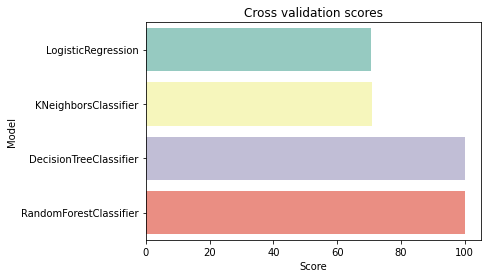

In [83]:
g = sns.barplot("Score", "Model", data=score_df, palette="Set3", orient = "h")
g = g.set_title("Cross validation scores")